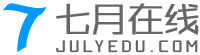


# 七月在线 《Python基础入门 第三期》 第四课 函数（上）


> [七月在线](https://www.julyedu.com) David@2018-12-10

## 本节课程目标
### 复习上节课内容
### 函数定义，函数体，位置参数与关键字参数，函数返回值
### 不定长位置参数与关键字参数
### 偏函数
### Python中的LEGB访问规则

### 完成课后作业：

## 函数定义，函数结构，位置参数与关键字参数，函数返回值

### 函数定义，与函数结构

In [51]:
%config ZMQInteractiveShell.ast_node_interactivity='all'

In [52]:
l1=[1,'s','china']
s1={'f',56}
d1={'name':'jack'}
len(s1)

2

In [53]:
#函数定义与函数结构
def myfunc1(parm1,parm2='amazing'):
    "\
    here is document for this function\
    multi lines \
    "#__doc__ here
    
    something=parm1
    
    return str(something)+' is '+parm2

myfunc1
myfunc1('china')

<function __main__.myfunc1(parm1, parm2='amazing')>

'china is amazing'

In [55]:
#%reset
%whos

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


Interactive namespace is empty.


##### 延伸阅读:Python3新增函数特性：注释增强/Annotations

In [56]:
def myfunc2(parm1:'parm user given string to output',parm2:'this parm default value is amazing, user still can replace it'='amazing')-> 'function return should be a string':
    "#__doc__ here"
    something=parm1
    return str(something)+' is '+parm2
myfunc2.__annotations__
myfunc2('car')

{'parm1': 'parm user given string to output',
 'parm2': 'this parm default value is amazing, user still can replace it',
 'return': 'function return should be a string'}

'car is amazing'

##### 延伸阅读:
def:运行期指令，以代码对象为参数创建函数实例，并在当前上下文中与指定的名字相关联

In [57]:
#def是运行期指令
import dis
dis.dis(compile("def test():pass","","exec"))

  1           0 LOAD_CONST               0 (<code object test at 0x1085a10c0, file "", line 1>)
              2 LOAD_CONST               1 ('test')
              4 MAKE_FUNCTION            0
              6 STORE_NAME               0 (test)
              8 LOAD_CONST               2 (None)
             10 RETURN_VALUE

Disassembly of <code object test at 0x1085a10c0, file "", line 1>:
  1           0 LOAD_CONST               0 (None)
              2 RETURN_VALUE


In [58]:
#def的伪码
#test=make_function('test',code)#dis操作是在函数实例创建完成后针对__code__，而非针对创建过程

#以单个代码对象为模板创建多个函数实例
def make_func(n):
    ret=[]
    for i in range(n):
        def test():print('hello',n)
        print(id(test),id(test.__code__))
        ret.append(test)
    return ret

make_func(4)#不同实例，相同代码，也可以不同实例，不同代码（属性动态添加）

4439380480 4439381744
4435088160 4439381744
4438224480 4439381744
4439294032 4439381744


[<function __main__.make_func.<locals>.test()>,
 <function __main__.make_func.<locals>.test()>,
 <function __main__.make_func.<locals>.test()>,
 <function __main__.make_func.<locals>.test()>]

##### 延伸阅读：Python的函数对象PyFunctionObject：
>作用：为上下文提供调用实例，并管理所需的状态数据。负责管理运行期状态，如默认参数，动态添加的属性，由MAKE_FUNCTION指令创建

In [62]:
#探索PyFunctionOjbect
def test1(a,b,c=1):
    str1='julyedu.com'
    print(c)
    return b

print('co_object: {}'.format(test1.__code__))# PyCodeObject<code object test1 at 0x0000023812E75A50, file "<ipython-input-14-1306b5bc9b20>", line 1>
print('\nco_name: {}'.format(test1.__code__.co_name))#函数名
print('co_filename: {}'.format(test1.__code__.co_filename))#函数所在文件名<ipython-input-16-fc6b304ba0cd>
print('co_firstlineno: {}'.format(test1.__code__.co_firstlineno))#函数在文件中的首行的行数1

print('\nco_code: {}'.format(test1.__code__.co_code))#函数中的代码对象字节码（二进制存储）
print('co_lnotab: {}'.format(test1.__code__.co_lnotab))#'字节码的偏移值与对应的源码的行号的相对值'

print('\nco_stacksize: {}'.format(test1.__code__.co_stacksize))#占用了几个栈桢

co_object: <code object test1 at 0x10889ea50, file "<ipython-input-62-eb79d9f886d2>", line 2>

co_name: test1
co_filename: <ipython-input-62-eb79d9f886d2>
co_firstlineno: 2

co_code: b'd\x01}\x03t\x00|\x02\x83\x01\x01\x00|\x01S\x00'
co_lnotab: b'\x00\x01\x04\x01\x08\x01'

co_stacksize: 2


##### 扩展阅读：栈(Stack)与栈帧（Stack Frame）

Python中栈的分类：
> 用户栈：函数被调用时，会专门为其分配用户栈内存，用户栈内存除用来存储变量外，还包括字节码参数和返回值所需空间。   
> 系统栈：用于机器执行，用户栈用于代码执行状态。


Python中栈的作用：
> 栈用于指令执行，与线程绑定。函数调用与执行都依赖于线程栈上存储的上下文和执行状态。

```
import dis
def test(a,b):
    c=a+b
    return c
    
dis.dis(test)

  2           0 LOAD_FAST                0 (a) #从Fast读取参数a,压入用户栈
              2 LOAD_FAST                1 (b)#从Fast读取参数b,压入用户栈
               4 BINARY_ADD                  #系统指令从用户栈读取操作数，执行加法操作
              6 STORE_FAST               2 (c)#结果写回Fast

  3           8 LOAD_FAST                2 (c)
             10 RETURN_VALUE
```

栈帧（Stack Frame）
> 线程栈这块内存中，每个被调用函数都分配着一块区域
> Call stack是函数调用堆栈（运行时函数的调用过程）,除返回地址，还有为函数提供参数，局部变量存储空间等

调用函数时的内存变化：
>函数每次调用，都会新建栈帧，用于局部变量和执行过程存储。执行完成后，栈帧内存被回收，同时释放相关对象。

In [63]:
def test():
    return id(locals())

print(test())#Create New StackFrame
print(test())#Create Another New StackFrame

4439111712
4432514736


查看栈帧对象PyFrameObject
> PyFrameObject,栈帧表示程序运行时函数调用栈中的某一帧。函数没有属性可以获取它，因为它在函数调用时才会产生   
> 想要获得某个函数相关的栈帧，则必须在调用这个函数且这个函数尚未返回时获取。


>sys._getframe()方法可以获取当前栈帧   
>>_back: 调用栈的前一帧   
>>f_code: 栈帧对应的code对象   
>>f_locals: 用在当前栈帧时与内建函数locals()相同，但你可以先获取其他帧然后使用这个属性获取那个帧的locals()   
>>f_globals: 用在当前栈帧时与内建函数globals()相同，但你可以先获取其他帧……   
>>f_builtins -> dict key:  python的内置函数名   


In [70]:
import sys
def func():    
    frame = sys._getframe()
    print("*** f_back *** ")
    print(frame.f_back)
    print("*** frame ***")
    print(frame)
    print("*** f_code ***")
    print(frame.f_code)
    print("*** f_locals ***")
    print(frame.f_locals)
    print("*** f_globals ***")
    print(frame.f_globals)
    #你可以打印frame的各个域

print(func.__code__)
func()    

<code object func at 0x1089a4930, file "<ipython-input-70-ea6d4756c65d>", line 2>
*** f_back *** 
<frame at 0x108993430, file '<ipython-input-70-ea6d4756c65d>', line 17, code <module>>
*** frame ***
<frame at 0x7ffe9e6a9e90, file '<ipython-input-70-ea6d4756c65d>', line 7, code func>
*** f_code ***
<code object func at 0x1089a4930, file "<ipython-input-70-ea6d4756c65d>", line 2>
*** f_locals ***
{'frame': <frame at 0x7ffe9e6a9e90, file '<ipython-input-70-ea6d4756c65d>', line 11, code func>}
*** f_globals ***
{'__name__': '__main__', '__builtin__': <module 'builtins' (built-in)>, '__builtins__': <module 'builtins' (built-in)>, '_ih': ['', "l1=[1,'s','china']\ns1={'f',56}\nd1={'name':'jack'}\nlen(s2)", "l1=[1,'s','china']\ns1={'f',56}\nd1={'name':'jack'}\nlen(s1)", 'get_ipython().run_line_magic(\'config\', "ZMQInteractiveShell.ast_node_interactivity=\'all\'")', '#函数定义与函数结构\ndef myfunc1(parm1,parm2=\'amazing\'):\n    "\\\n    here is document for this function\\\n    multi lines \\\n    "#

In [73]:
import sys
value = 3
def A():
    frame = sys._getframe()
    print ('current function is : ', frame.f_code.co_name)
    caller = frame.f_back
    print ('caller function is : ', caller.f_code.co_name)
    print ("caller's local namespace : ", caller.f_locals)
    print ("caller's global namespace : ",caller.f_globals.keys())
def B():
    a = 1
    b = 2
    print('------')
    A()
    print('------')
    
B()

cf=sys._current_frames()
print(cf)

------
current function is :  A
caller function is :  B
caller's local namespace :  {'a': 1, 'b': 2}
caller's global namespace :  dict_keys(['__name__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', '_i', '_ii', '_iii', '_i56', 'myfunc2', '_', '__', '___', '_56', '_i57', 'dis', '_i58', 'make_func', '_58', '_i59', 'test1', '_i60', '_i61', '_i62', '_i63', 'test', '_i64', 'sys', 'func', '_i65', '_i66', '_i67', '_i68', '_i69', '_i70', '_i71', 'value', 'A', 'B', '_i72', 'cf', '_72', '_i73'])
------
{123145489965056: <frame at 0x108991450, file '/usr/local/Cellar/ipython/7.5.0/libexec/vendor/lib/python3.7/site-packages/zmq/utils/garbage.py', line 47, code run>, 123145484709888: <frame at 0x1083f2a50, file '/usr/local/Cellar/ipython/7.5.0/libexec/vendor/lib/python3.7/site-packages/ipykernel/parentpoller.py', line 39, code run>, 123145479454720: <frame at 0x1084e5050, file '/usr/local/Cellar/ipython/7.5.0/libexec/lib/python3.7/site-packages/IPy

In [74]:
import sys,dis
def A():
    x='func A'
    B()

def B():
    C()

def C():
    c_var='test'
    f=sys._getframe(0)#向上2级，获取A栈帧,1获取B,0是当前
    print('frame及遍历---------------------------------------------------------------') 
    print(f.f_code.co_name,'栈帧类型和对象:',type(f),f)  
#     print('遍历:',dir(f))
    print('名字空间---------------------------------------------------------------')
#     print('函数所在模块的的名字空间f_globalsa或直接globals():',f.f_globals)#返回函数所在模块的的名字空间
#     print('frame f_builtins:',f.f_builtins)#A人   
    print(f.f_code.co_name,'名字空间f_locals（运行期）:',f.f_locals)#A名字空间（运行期）
    print('代码对象---------------------------------------------------------------')    
    print(f.f_code.co_name,'代码对象f_code:',f.f_code)#A代码对象
    print(f.f_code.co_name,'代码对象f_fileno:',f.f_lineno)#所在文件行数   
    print(f.f_code.co_name,'最后执行指令的偏移量f_lasti:',f.f_lasti)#A最后执行指令的偏移量

    print('栈帧对象---------------------------------------------------------------')        
    print(f.f_code.co_name,' frame f_back:',f.f_back)#前一帧对象
    print(f.f_code.co_name,' frame f_trace:',f.f_trace)#trace对象
    
    print('f_code,---------------------------------------------------------------')        
    print('该f_code即为对应函数的代码对象-------------------------')
#     print('遍历f_code:',dir(f.f_code))
    print('co_stacksize',f.f_code.co_stacksize)
    

A()

frame及遍历---------------------------------------------------------------
C 栈帧类型和对象: <class 'frame'> <frame at 0x10891a050, file '<ipython-input-74-06ace6844c46>', line 13, code C>
名字空间---------------------------------------------------------------
C 名字空间f_locals（运行期）: {'c_var': 'test', 'f': <frame at 0x10891a050, file '<ipython-input-74-06ace6844c46>', line 18, code C>}
代码对象---------------------------------------------------------------
C 代码对象f_code: <code object C at 0x108a95e40, file "<ipython-input-74-06ace6844c46>", line 9>
C 代码对象f_fileno: 21
C 最后执行指令的偏移量f_lasti: 126
栈帧对象---------------------------------------------------------------
C  frame f_back: <frame at 0x10729e530, file '<ipython-input-74-06ace6844c46>', line 7, code B>
C  frame f_trace: None
f_code,---------------------------------------------------------------
该f_code即为对应函数的代码对象-------------------------
co_stacksize 5


返回所有栈帧
> sys._current_frames()#返回一个dict对象

In [75]:
import sys
sys._current_frames()#返回一个dict

{123145489965056: <frame at 0x108991450, file '/usr/local/Cellar/ipython/7.5.0/libexec/vendor/lib/python3.7/site-packages/zmq/utils/garbage.py', line 47, code run>,
 123145484709888: <frame at 0x1083f2a50, file '/usr/local/Cellar/ipython/7.5.0/libexec/vendor/lib/python3.7/site-packages/ipykernel/parentpoller.py', line 39, code run>,
 123145479454720: <frame at 0x7ffea0cd9190, file '/usr/local/Cellar/python/3.7.4/Frameworks/Python.framework/Versions/3.7/lib/python3.7/threading.py', line 296, code wait>,
 123145473126400: <frame at 0x108342050, file '/usr/local/Cellar/ipython/7.5.0/libexec/vendor/lib/python3.7/site-packages/ipykernel/heartbeat.py', line 61, code run>,
 123145467871232: <frame at 0x7ffea0a63580, file '/usr/local/Cellar/python/3.7.4/Frameworks/Python.framework/Versions/3.7/lib/python3.7/selectors.py', line 558, code select>,
 4420482496: <frame at 0x10729e6d0, file '<ipython-input-75-114acff59567>', line 2, code <module>>}

### 函数的参数:位置参数（定位参数）     与       关键字参数

#### 位置参数（定位参数）

In [ ]:
def myadd2(a,b):
    return a+b

def myadd3(a,b,c):
    return a+b+c

def myadd4(a,b,c,d):
    print(d)

In [35]:
#个数匹配

##### 扩展阅读： Python可选位置参数

Python内置电池round函数的帮助中，出现了[, ndigits]这个东东。
其它的一些Python对象提供的方法中也有类似的东东出没，比如对序列对象进行切片访问时。

就是Python可选位置参数。

注意：这样的参数是无法通过自定义函数来创建的。只有Python中的内置函数可以。


```
Help on built-in function round in module builtins:

round(...)
    round(number[, ndigits]) -> number
    
    Round a number to a given precision in decimal digits (default 0 digits).
    This returns an int when called with one argument, otherwise the
    same type as the number. ndigits may be negative.

```

### 关键字参数

In [76]:
#关键字参数，与不定长关键字参数
def myadd0(args,lastnum=1000):
    return args+lastnum

myadd0(7)

1007

In [77]:
def myadd(parm1,parm2=500):
    print(parm1+parm2)
    
def myadd(parm1,parm2=500,parm3=5):
    print(parm1+parm2)    
    
myadd?

##### 扩展阅读：查看函数签名

In [79]:
from inspect import signature# 注意是小写的signature

def func(parm1,parm2='kw'):
    return parm1

def func(parm1):
    pass

# 获取函数签名
func_sig = signature(func)
print(func_sig)
# 通过函数签名的parameters属性，可以获取函数参数
func_params = func_sig.parameters
print(func_params)

#或者直接使用ipython下的?

(parm1)
OrderedDict([('parm1', <Parameter "parm1">)])


##### 扩展阅读：函数参数在`__code__`对象下的反映

In [80]:
def test1(a,b,c=1):
    str1='julyedu.com'
    return b
    
'co_argcount',test1.__code__.co_argcount#位置参数的个数，而co_nlocals是局部变量数目，包括位置参数在内。
'co_nlocals&co_varnames',test1.__code__.co_nlocals,test1.__code__.co_varnames#多少个局部变量,以及及变量的名字。

'符号名集合co_names',test1.__code__.co_names   #符号名集合
'常量集合co_const',test1.__code__.co_consts  #常量集合


# 位置参数，键（关键字）参数，*args扩展位置参数[元组对象]和**kwargs扩展键（关键字）参数[字典]。

# 位置参数还能设置默认值，如果有默认值，默认值是在MAKE_FUNCTION指令赋值给`funcname.__defaults__`的。

'co_flags',test1.__code__.co_flags
# 【1】function没有args或*kw时，`funcname.__code__.co_flags=67`;
# 【2】function有args没有*kw时，funcname.__code__.co_flags=71;
# 【3】function没有args有*kw时，funcname.__code__.co_flags=75;
# 【4】function既有args也有*kw时，funcname.__code__.co_flags=79;
# 【5】function是一个generator时，funcname.__code__.co_flags=99.

#对于像 def f(a, b, *lst):这样的函数，如果调用函数时参数为f(1,2,3,4)，其实在PyCodeObject对象中的co_argcount=2, co_nlocals=3。

('co_argcount', 3)

('co_nlocals&co_varnames', 4, ('a', 'b', 'c', 'str1'))

('符号名集合co_names', ())

('常量集合co_const', (None, 'julyedu.com'))

('co_flags', 67)

##### 扩展阅读：动态管理函数对象的参数的默认值与属性

In [97]:
##函数对象参数的默认值存放在函数对象的,__defaults__属性中，是一个Tuple类对象

#字节数换算为KB，MB,GB,TB
def CaluSize(bytesize,trans='KB'):
    if trans=='KB':size=1024
    if trans=='MB':size=1024**2
    if trans=='GB':size=1024**3
    if trans=='TB':size=1024**4
    return str(bytesize//size)+trans

CaluSize.__defaults__
CaluSize.__defaults__=('TB',)
CaluSize.__defaults__

CaluSize(110241550654651654544)
110241550654651654544//(1024**4)
110241550654651654544/(1024**4)

('KB',)

('TB',)

'100264106TB'

100264106

100264106.23563758

In [98]:
##函数对象属性
##函数对象属性值存放在函数对象的,__dict__属性中，是一个Dict类对象
CaluSize
dir(CaluSize)
CaluSize.__dict__
CaluSize.__dict__['new_atrr']='test'
CaluSize.__dict__
dir(CaluSize)

<function __main__.CaluSize(bytesize, trans='TB')>

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

{}

{'new_atrr': 'test'}

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'new_atrr']

### 函数返回值 

In [89]:
#函数返回值      
#有返回值 与无返回值（即使没有return语句，依旧会return一个NoneType类的对象None)

def myadd(a):
    return a,5

def myadd1(a,b,c,d):
    print(a+b+c+d)

def myadd2(a,b):
    pass

##  不定长位置参数与不定长关键字参数

### 不定长位置参数

In [100]:
def myadd1(a,b,c,d,*parms):
    print(type(parms))
    print('parms:',parms)
    print('a,b,c,d:',a,b,c,d)
    return sum(parms)
myadd1(1,2,3,4,5,6)

def myadd2(arg,*args):
    print(type(args))
    print(args)
    return sum(args)
myadd2(18,1,2,3)


def myadd3(arg,*args):
    print(type(args))
    print(args)
    return sum(args)
myadd3(18,1,2,3)

<class 'tuple'>
parms: (5, 6)
a,b,c,d: 1 2 3 4


11

<class 'tuple'>
(1, 2, 3)


6

<class 'tuple'>
(1, 2, 3)


6

### 不定长关键字参数

In [104]:
def myadd(**kwargs):
    print(kwargs)
    
myadd(add='sh',tel=13333,name='jack',height=178)
myadd(address='sh',cellphone=13333,)
print()

def myaddkw(**names):
    print(type(names))
    print(list(names.values()))
    return list(names.values())
    
myaddkw(name='david',gender='male',age=0)
myaddkw(args=5, lastnum=6)

{'add': 'sh', 'tel': 13333, 'name': 'jack', 'height': 178}
{'address': 'sh', 'cellphone': 13333}

<class 'dict'>
['david', 'male', 0]


['david', 'male', 0]

<class 'dict'>
[5, 6]


[5, 6]

### 综合使用

In [105]:
l1=[1,2,3,4,5,6]
a,b,c,d,e,f=l1
f

6

In [110]:
l1=[1,2,3,4,5,6]
a,b,*c,d,e=l1
a,b,c,d,e

def myfun1(*args,**kwargs):
    print(args)
    for item in kwargs:
         print(item)
d1={'name':'david','add':'bj','date':'2018-8-1'}
l1=[1,2,3,4,5,6,7]
myfun1(*l1,**d1)

(1, 2, [3, 4], 5, 6)

(1, 2, 3, 4, 5, 6, 7)
name
add
date


##### 扩展阅读:Python函数参数中的`/`与`*`

In [111]:
sorted?

In [115]:
l1=['China','Japan','UK','Beijing']

#Signature: sorted(iterable, /, *, key=None, reverse=False)
#参数/是指，iterable这个参数只能以位置参数形式给，不能以关键字参数形式给，否则报错
#这类参数只能在C API中被指定，def定义会报错

#正常
sorted(l1)
#报错
#sorted(iterable=l1)#TypeError: Function takes at least 1 positional arguments (0 given)

#参数*是指，key这个参数只能以关键字参数形式给，不能以位置参数形式给，以否则报错
#这类参数可以自行定义
#正常
sorted(l1,key=lambda x:(x[-2]))
sorted(l1,key=lambda x:(x[-2]),reverse=True)
#报错
# sorted(l1,lambda x:(x[-1]))#TypeError: must use keyword argument for key function

['Beijing', 'China', 'Japan', 'UK']

['UK', 'Japan', 'China', 'Beijing']

['China', 'Beijing', 'Japan', 'UK']

## 偏函数

In [116]:
#偏函数,固定了部分参数的函数

import functools

a=0x24
a
int(str(a),base=32)

hex2int=functools.partial(int,base=16)

type(hex2int)
# hex2int(str(a))

36

102

functools.partial

In [119]:
def mysal(nums,rate=6.95):
    return nums*rate

mysal(5000)
mysal(12000)

import functools
rmb2eur=functools.partial(mysal,rate=1.01)
rmb2jpn=functools.partial(mysal,rate=82)

rmb2jpn(5000)

34750.0

83400.0

410000

## Python中的LEGB访问规则

### 先讲LGB这三层楼（名字空间），E这层楼下节课会讲到

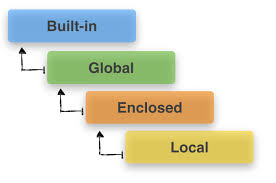

In [120]:
def a():
    f=15
    print(locals())
    
a()
f

{'f': 15}


6

##### 扩展阅读：Eval与Exec这两个函数在名字空间

In [135]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


In [136]:
# exec?
# Signature: exec(source, globals=None, locals=None, /)
# Docstring:
# Execute the given source in the context of globals and locals.


#要exec的python源码
ns={}#传入的容器是空的
exec('def inside_func():pass',ns)
ns['inside_func']#返回的窗器是带有结果的，也就是说传入名字空间被改变了

<function inside_func()>

In [141]:
s='''
def test():
    print(hex(id(locals())),__name__)
    #exec的代码是以builtins模块下进行运行的
    print(globals())

test()
'''
g={'g':666}#传给s的全局名字空间
print('入口程序模块：',hex(id(ns)),__name__)

exec(s,g)

print("\n*** print the variables ***")
%whos

入口程序模块： 0x108989e60 __main__
0x108337690 builtins
{'g': 666, '__builtins__': {'__name__': 'builtins', '__doc__': "Built-in functions, exceptions, and other objects.\n\nNoteworthy: None is the `nil' object; Ellipsis represents `...' in slices.", '__package__': '', '__loader__': <class '_frozen_importlib.BuiltinImporter'>, '__spec__': ModuleSpec(name='builtins', loader=<class '_frozen_importlib.BuiltinImporter'>), '__build_class__': <built-in function __build_class__>, '__import__': <built-in function __import__>, 'abs': <built-in function abs>, 'all': <built-in function all>, 'any': <built-in function any>, 'ascii': <built-in function ascii>, 'bin': <built-in function bin>, 'breakpoint': <built-in function breakpoint>, 'callable': <built-in function callable>, 'chr': <built-in function chr>, 'compile': <built-in function compile>, 'delattr': <built-in function delattr>, 'dir': <built-in function dir>, 'divmod': <built-in function divmod>, 'eval': <built-in function eval>, 'exec': <built

In [142]:
#eavl,显示传入容器对象做为动态代码的专用名字空间
# Signature: eval(source, globals=None, locals=None, /)
# Docstring:
# Evaluate the given source in the context of globals and locals.

g={"x":100}
l={"y":101}

eval("x+y",g,l)

201

## 完成课后作业：

### 实现能输出指定长度fib数列函数

In [157]:
def Fib_fun(n):
    Fib=[]
    if n<=0:
        Fib=[]
    elif n==1:
        Fib=[1]
    elif n==2:
        Fib=[1,1]
    else:
        Fib=[1,1]
        for idx in range(2,n):
            Fib.append(Fib[idx-1]+Fib[idx-2])
    return Fib

print("Fibonacci sequence: {}".format(Fib_fun(50)))

Fibonacci sequence: [1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229, 832040, 1346269, 2178309, 3524578, 5702887, 9227465, 14930352, 24157817, 39088169, 63245986, 102334155, 165580141, 267914296, 433494437, 701408733, 1134903170, 1836311903, 2971215073, 4807526976, 7778742049, 12586269025]


### 定义一个函数，接受任意三个数字的输入，并按顺序从小到大输出

In [175]:
def sort3(a, b, c):
    if a>b:
        a,b=b,a
    if a>c:
        a,c=c,a
    if b>c:
        b,c=c,b
    return (a,b,c)

sort3(1,2,3)
sort3(1,3,2)
sort3(2,1,3)
sort3(2,3,1)
sort3(3,1,2)
sort3(3,2,1)

(1, 2, 3)

(1, 2, 3)

(1, 2, 3)

(1, 2, 3)

(1, 2, 3)

(1, 2, 3)

### 自己实现一个支持可变参数的函数

In [185]:
def user_info(name,age,*locations,sex='female',**others):
    print("name: {}".format(name))
    print("age: {}".format(age))
    print("sex: {}".format(sex))
    print("locations: {}".format(locations))
    print("others: {}".format(others))
    
user_info('yangpan',24,"China","Beijing",is_student=False,sex="female",is_marriged='0')

name: yangpan
age: 24
sex: female
locations: ('China', 'Beijing')
others: {'is_student': False, 'is_marriged': '0'}


### 要求创建一个函数，它可以接收，位置参数，不定长位置参数，不定长关键词参数，并按要求输出 。
- 输入班级名，班级特色（如’勤奋’,’颜值高’ ）等等不同特色，班级不同同学的姓名与年龄。
- 要求输出，班级名，班级特色，班级成员，班级成员的平均年龄。

In [190]:
def class_info(name,*characters,**students):
    print("class name: {}".format(name))
    print("characters: {}".format(characters))
    persons=[]
    age_sum=0
    for s_name,s_age in students.items():
        persons.append(s_name)
        age_sum += s_age
    print("all persons: {}".format(persons))
    print("the average age: {}".format(round(age_sum/len(students), 1)))

class_info("pek16","China","17 persons","Students",Carl=19,Tom=21,Perla=20,Nancy=19)

class name: pek16
characters: ('China', '17 persons', 'Students')
all persons: ['Carl', 'Tom', 'Perla', 'Nancy']
the average age: 19.8


### 创建能根据输入计算BMI指数的函数

身体质量指数（BMI）是根据人的体重和身高计算得出的一个数字，BMI是可靠的身体肥胖指标，其计算公式：BMI=Weight/High2，其中体重单位为公斤，身高单位为米。

- 计算公式为：$BMI=体重（kg）÷身高^2（m）$

- 提示用户输入体重（kg）和身高的数字(m)(注意单位），然后计算BMI。

- 根据BMI指数范围，定义当前健康状态。BMI指数在18至25之间定义为健康的标准体重,小于该范围定义为偏瘦，超过该范围定义为偏重。

- 将BMI指数和其所代表状态输出 

In [206]:
def get_BMI():
    print("please input your weight(kg):")
    weight=float(input())
    print("please input your high(m):")
    high=float(input())
    
    BMI=weight/(high**2)
    status=""
    if BMI<18:
        status="thin"
    elif BMI<=25:
        status="normal"
    else:
        status="fat"
    
    return BMI,status

res,stat=get_BMI()
print("Your BMI is {}, the status is {}".format(res, stat))

please input your weight(kg):
105
please input your high(m):
1.83
Your BMI is 31.353578787064404, the status is fat
